## INFORMAÇÕES DO ALUNO

In [0]:
'''
SOFTWARES PARA USO EM CIÊNCIA DE DADOS II
PROJETO 02/02 - Beer Consumption
PROFESSOR: NASSER BOAN
ALUNO: ARTHUR FARIAS
MATRÍCULA: 1931133115
'''

# RESUMO E RESULTADOS

In [0]:
'''

Este projeto objetiva predizer o consumo de cerveja pra cidade de São Paulo com base em algumas informações 
disponibilizadas.
Após avaliação inicial do nosso arquivo de dados, verificamos que as configurações regionais não seguiam os padrões. 
Assim, a importação dos dados foi realizada definindo que todas as variáveis seriam do tipo "string" e que uma 
posterior adequação seria feita. Também foi realizada uma renomeação das variáveis para facilitar o trabalho.

Iniciando o processo de análise exploratória dos dados, foram identificados muitos dados "missing". Com isso, optamos
por eliminar as linhas onde todas as variáveis tivessem valores nulos. Em seguida iniciando o tratamento das colunas, 
adequando-as para que pudessem ser transformadas em "data types" de tipos mais adequados para modelos de Regressão linear.
Realizemos também a criação de novas "features" que posteriormente não se mostraram promissoras na explicação que desejavamos.
Por fim, dentro deste sub-tópico, apesar do box-plot indicar possiveis outliers para algumas variáveis, os testes com 
filtros não melhoraram nosso resultado.

Uma vez definidas as variáveis que comporiam o modelo, iniciamos as regressões:

Na Regressão Linear Simples a variável temperatura máxima foi a que melhor explicou o consumo de cerveja obtendo precisão
pouco superior a 41%.
Na Regressão Linear Multipla o resultado foi de 65,6% de acerto na partição de teste e 70,7% no treino. O que já era um
resultado melhor do que na Regressão Linear Simples.
Por fim, na Regressão Polinomial o grau 2 foi o que apresentou uma leve melhora, elevando o resultado de teste e treino para
65,8% e 70,8% respectivamente, sendo o melhor resultado do projeto.

Assim, nosso modelo apesar de não acertar numa faixa excelente, apresenta-se sem vicios e com bom nível de precisão.

'''

# IMPORTANDO DATASET E BIBLIOTECAS

## Bibliotecas

In [0]:
## IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS NO PROJETO ##
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split

# Comment this if the data visualisations doesn't work on your side
# %matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [3]:
# SE O GOOGLE DRIVE NÃO QUISER MONTAR
from google.colab import drive
drive.mount('/content/drive')
#4/zQErY0XYvMT8e9M6WUlfE75iFXPdCAL-FdCOd2ecZLxtibMqDqsN39c

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Dataset

In [4]:
## IMPORTANDO A BASE E REALIZANDO OS TRATAMENTOS INICIAIS
df = pd.read_csv('/content/drive/My Drive/git/Beer_Consumption/data/Consumo_cerveja.csv',sep=',',encoding='iso-8859-1', dtype=str)
df.columns = [x.lower() for x in df.columns]
df_columns = df.columns
df.head(3)

,data,temperatura media (c),temperatura minima (c),temperatura maxima (c),precipitacao (mm),final de semana,consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814


In [5]:
# MELHORANDO O NOME DAS VARIÁVEIS
df.columns = ['data', 't_media', 't_minima', 't_maxima', 'precipitacao', 'fim_semana', 'consumo']
df_columns = df.columns
df.head(3)

,data,t_media,t_minima,t_maxima,precipitacao,fim_semana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814


In [0]:
# DICIONÁRIO DE DADOS

'''
data            Data
t_media         Temperatura Media (C)
t_minima        Temperatura Minima (C)
t_maxima        Temperatura Maxima (C)
precipitacao    Precipitacao (mm)
fim_semana      Final de Semana
consumo         Consumo de cerveja (litros)
'''

# ANÁLISE EXPLORATÓRIA

In [39]:
# VERIFICANDO O SHAPE DO DATASET E CRIANDO VARIÁVEIS
n_rows    = df.shape[0]
n_cols    = df.shape[1]
v_cols    = df.columns
v_answer  = 'consumo'

print('O Dataset possui' , n_rows, 'linhas e' , n_cols , 'colunas.')

O Dataset possui 365 linhas e 7 colunas.


In [8]:
# IDENTIFICANDO VALORES NULOS
if df.isnull().values.any() == True:
  print(df.isna().sum(), '\n\n\nVALORES PERCENTUAIS DE NULO\n')
  print((df.isnull().sum()/n_rows).round(2)*100)
else:
  print('O Dataset não possui valores nulos.')

data            576
t_media         576
t_minima        576
t_maxima        576
precipitacao    576
fim_semana      576
consumo         576
dtype: int64 


VALORES PERCENTUAIS DE NULO

data            61.0
t_media         61.0
t_minima        61.0
t_maxima        61.0
precipitacao    61.0
fim_semana      61.0
consumo         61.0
dtype: float64


In [0]:
# REMOVENDO AS LINHAS ONDE TODAS AS VARIÁVEIS TIVEREM VALORES NULO
df = df.dropna(thresh=7)

In [38]:
# IDENTIFICANDO VALORES NULOS
if df.isnull().values.any() == True:
  print(df.isna().sum(), '\n\n\nVALORES PERCENTUAIS DE NULO\n')
  print((df.isnull().sum()/n_rows).round(2)*100)
else:
  print('O Dataset não possui valores nulos.')

O Dataset não possui valores nulos.


In [11]:
# VERIFICANDO INFORMAÇÕES DO DATASET
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          365 non-null    object
 1   t_media       365 non-null    object
 2   t_minima      365 non-null    object
 3   t_maxima      365 non-null    object
 4   precipitacao  365 non-null    object
 5   fim_semana    365 non-null    object
 6   consumo       365 non-null    object
dtypes: object(7)
memory usage: 22.8+ KB


In [0]:
# AJUSTANDO AS INFORMAÇÕES PARA O PADRÃO IMPERIAL
# MODIFICANDO OS TIPOS DE VARIÁVEIS
df['consumo']       = [x.replace('.', '') for x in df['consumo']]
df['t_media']       = [x.replace(',', '.') for x in df['t_media']]
df['t_minima']      = [x.replace(',', '.') for x in df['t_minima']]
df['t_maxima']      = [x.replace(',', '.') for x in df['t_maxima']]
df['precipitacao']  = [x.replace(',', '.') for x in df['precipitacao']]

df['data']          = pd.to_datetime(df.data, format='%Y-%m-%d')
df['t_media']       = df['t_media'].astype('float64')
df['t_minima']      = df['t_minima'].astype('float64')
df['t_maxima']      = df['t_maxima'].astype('float64')
df['precipitacao']  = df['precipitacao'].astype('float64')
df['fim_semana']    = df['fim_semana'].astype('int64')
df['consumo']       = df['consumo'].astype('int64')

In [13]:
# VERIFICANDO INFORMAÇÕES DO DATASET
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   t_media       365 non-null    float64       
 2   t_minima      365 non-null    float64       
 3   t_maxima      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fim_semana    365 non-null    int64         
 6   consumo       365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 22.8 KB


In [19]:
# NÚMERO DE VALORES DISTINTOS NAS VARIÁVEIS
print(df.nunique(),'\n\nRELAÇÃO DE VARIÁVEIS COM ATÉ 20 VALORES DISTINTOS')

for i in v_cols:
  if df[i].nunique() <= 20:
    print(i,sorted(df[i].unique()))
#    print(df[i].value_counts(dropna=False))

data            365
t_media         277
t_minima        110
t_maxima        151
precipitacao     93
fim_semana        2
consumo         359
dtype: int64 

RELAÇÃO DE VARIÁVEIS COM ATÉ 20 VALORES DISTINTOS
fim_semana [0, 1]


In [0]:
# CRIAÇÃO DE NOVAS FEATURES
df['data_dia']        = df['data'].dt.day
df['data_mes']        = df['data'].dt.month
df['data_nrsemana']   = df['data'].dt.week
df['data_diasemana']  = df['data'].dt.dayofweek
df['choveu']          = np.where(df['precipitacao'] > 0 , 1, 0)
df['chuva_fraca']     = np.where(((df['precipitacao'] > 0) & (df['precipitacao'] < 10)) , 1, 0)
df['chuva_moderada']  = np.where(((df['precipitacao'] >= 10) & (df['precipitacao'] < 20)) , 1, 0)
df['chuva_forte']     = np.where(((df['precipitacao'] >= 20) & (df['precipitacao'] < 30)) , 1, 0)
df['temporal']        = np.where(df['precipitacao'] >= 30 , 1, 0)

In [121]:
# ESTATISTICA DESCRITIVA DOS DADOS
df.describe().round(2)

,t_media,t_minima,t_maxima,precipitacao,fim_semana,consumo,data_dia,data_mes,data_nrsemana,data_diasemana,choveu,chuva_fraca,chuva_moderada,chuva_forte,temporal
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.0,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37,15.72,6.53,27.00,3.0,0.40,0.24,0.07,0.05,0.05
std,3.18,2.83,4.32,12.42,0.45,4399.14,8.81,3.45,15.08,2.0,0.49,0.43,0.25,0.21,0.21
min,12.90,10.60,14.50,0.00,0.00,14343.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00,8.00,4.00,14.00,1.0,0.00,0.00,0.00,0.00,0.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00,16.00,7.00,27.00,3.0,0.00,0.00,0.00,0.00,0.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00,23.00,10.00,40.00,5.0,1.00,0.00,0.00,0.00,0.00
max,28.86,24.50,36.50,94.80,1.00,37937.00,31.00,12.00,53.00,6.0,1.00,1.00,1.00,1.00,1.00


In [122]:
# ALTERANDO A VISÃO PARA MELHORAR A VISUALIZAÇÃO
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
t_media,365.0,21.23,3.18,12.9,19.02,21.38,23.28,28.86
t_minima,365.0,17.46,2.83,10.6,15.30,17.90,19.60,24.50
t_maxima,365.0,26.61,4.32,14.5,23.80,26.90,29.40,36.50
precipitacao,365.0,5.20,12.42,0.0,0.00,0.00,3.20,94.80
fim_semana,365.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00
consumo,365.0,25401.37,4399.14,14343.0,22008.00,24867.00,28631.00,37937.00
data_dia,365.0,15.72,8.81,1.0,8.00,16.00,23.00,31.00
data_mes,365.0,6.53,3.45,1.0,4.00,7.00,10.00,12.00
data_nrsemana,365.0,27.00,15.08,1.0,14.00,27.00,40.00,53.00
data_diasemana,365.0,3.00,2.00,0.0,1.00,3.00,5.00,6.00


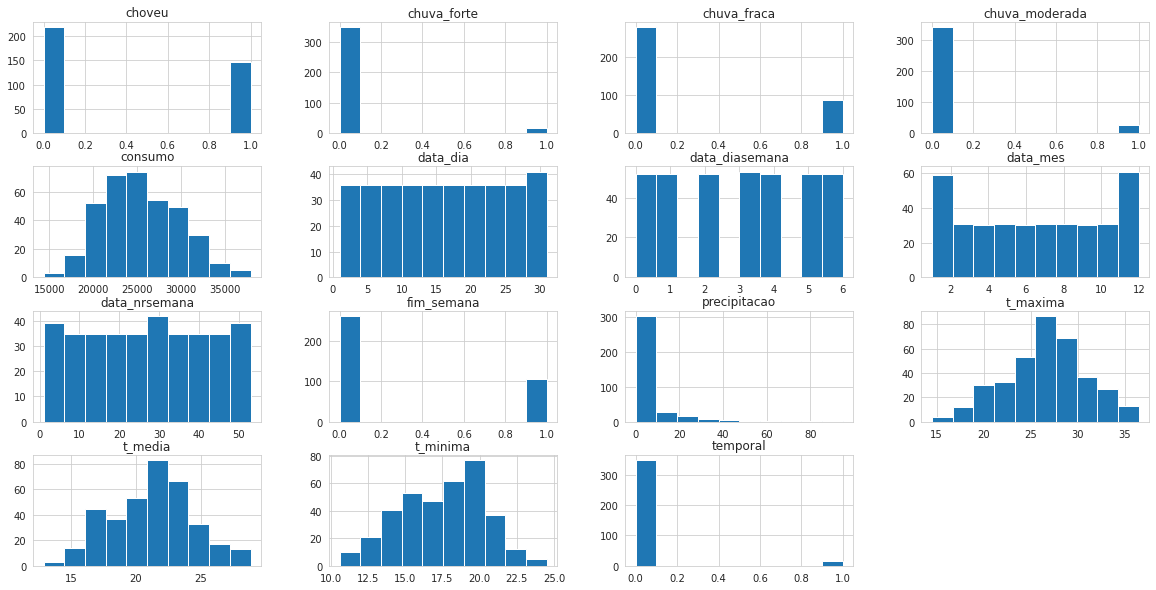

In [124]:
# GRÁFICO COM A DISTRIBUIÇÃO DOS VALORES
gr_dist = df.hist(figsize = (20,10))

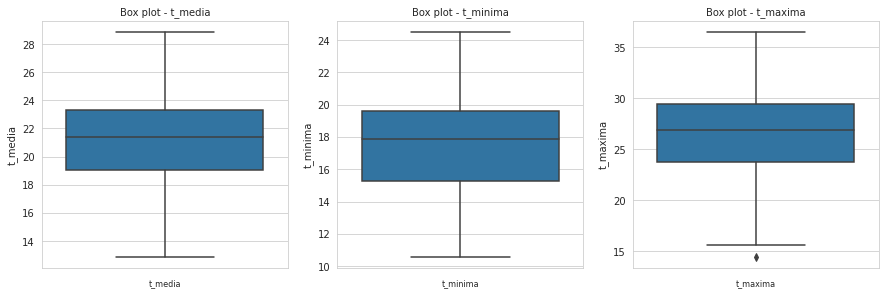

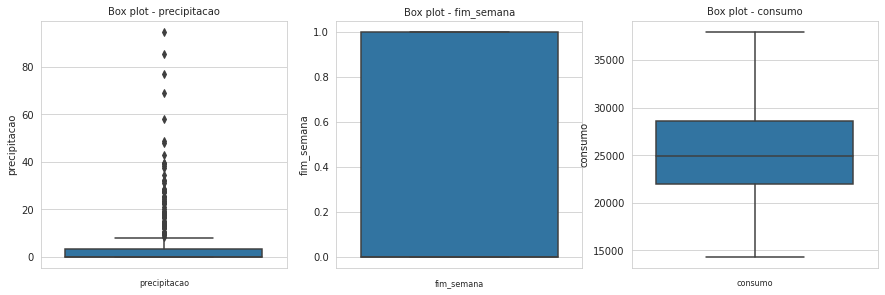

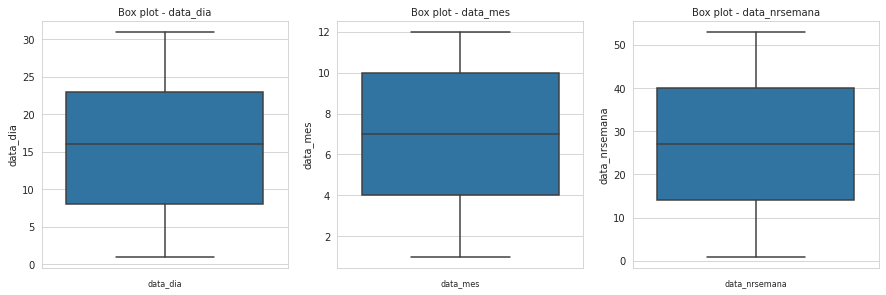

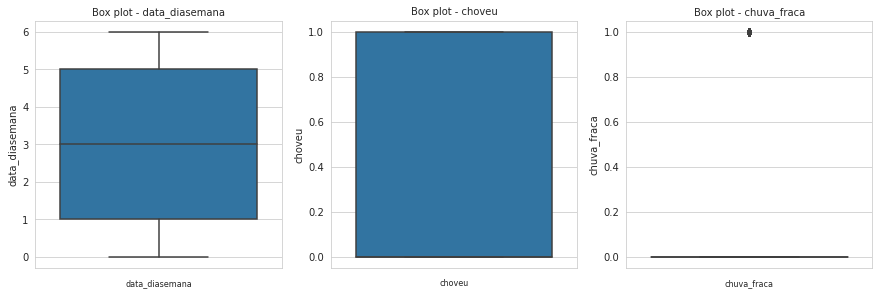

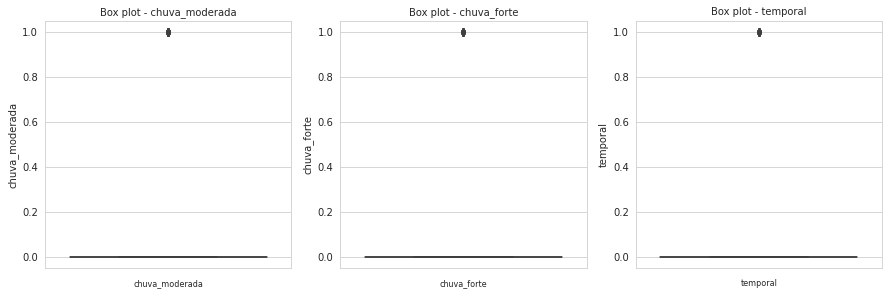

<Figure size 1080x720 with 0 Axes>

In [127]:
# BOX-PLOT DAS VARIÁVEIS EM BUSCA DE OUTLIERS
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(v_cols_num):
    if ix <= 3:
      ax1 = fig.add_subplot(2,3,ix)
      sns.boxplot(y=df[c], ax=ax1)
      ax1.set_title('Box plot - {}'.format(c), fontsize=10)
      ax1.set_xlabel(c, fontsize=8)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

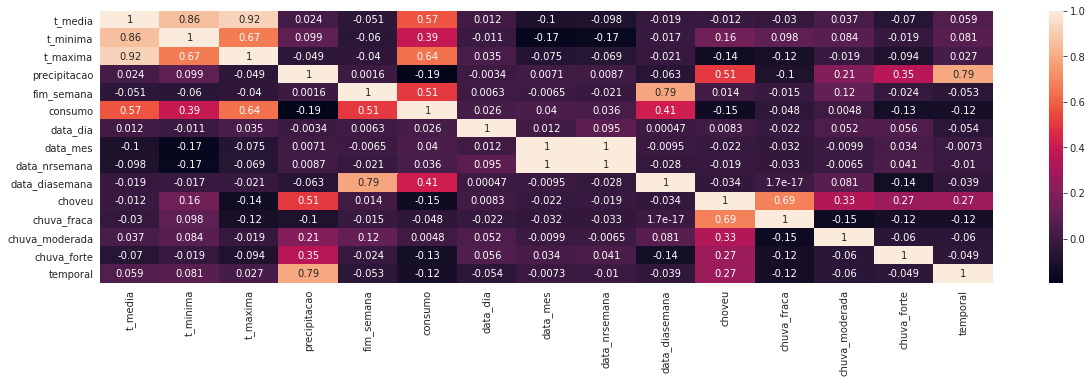

In [134]:
# VERIFICANDO A CORRELAÇÃO ENTRE AS VARIÁVEIS
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

In [0]:
# PELA MATRIZ DE CORRELAÇÃO ELIMINAMOS AS VARIÁVIES COM CORRELAÇÃO MUITO FRACA, INFERIOR A .20
df_tmp = df[['t_media','t_minima','t_maxima','fim_semana','data_diasemana','consumo']]

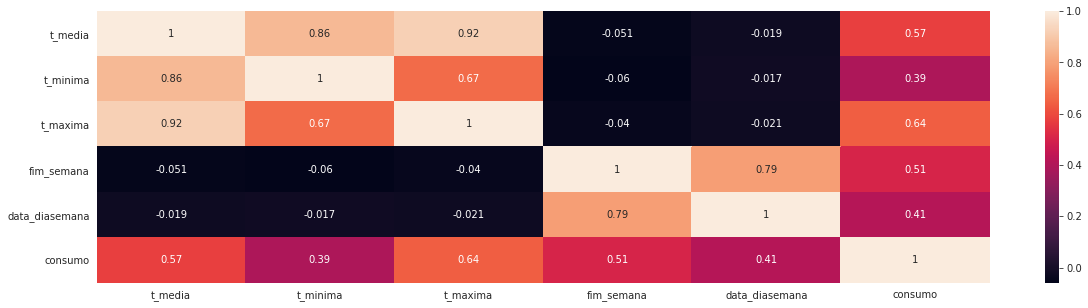

In [149]:
# VERIFICANDO A CORRELAÇÃO ENTRE AS VARIÁVEIS
plt.figure(figsize=(20,5))
sns.heatmap(df_tmp.corr(),annot=True)

In [0]:
# ELIMINAMOS AS VARIAVEIS COM ALTA CORRELAÇÃO ENTRE SI, SUPERIOR A .80
df1 = df_tmp[['t_maxima','t_minima','fim_semana','consumo']]

In [154]:
# CRIANDO VARIAVEIS POR CATEGORIA DA COLUNA
v_cols_num = []
v_cols_other = []
for i in df1.columns:
    if(df1[i].dtype == "float64" or df1[i].dtype == "int64"):
          v_cols_num.append(i)
    else:
          v_cols_other.append(i)
print('\t',v_cols_num,'\n\t',v_cols_other)

	 ['t_maxima', 't_minima', 'fim_semana', 'consumo'] 
	 []


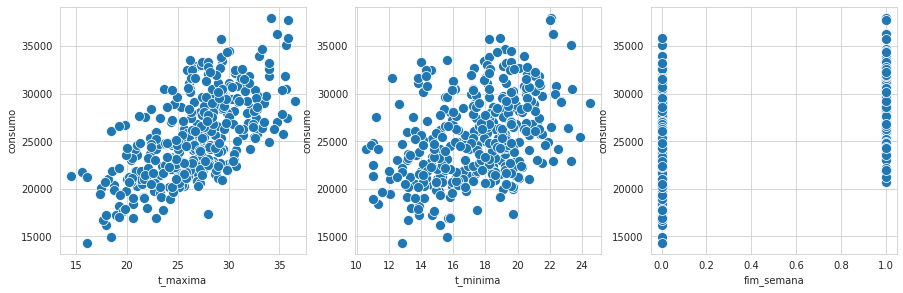

<Figure size 1080x720 with 0 Axes>

In [155]:
# VERIFICANDO A RELAÇÃO DAS VARIÁVEIS INDEPENDENTES COM A VARIÁVEL DEPENDENTE
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(v_cols_num):
    if ix <= 3:
      if c != v_answer:
        ax1 = fig.add_subplot(2,3,ix)
        sns.scatterplot(x=df1[c],y=df1[v_answer],s=100)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

# REGRESSÃO LINEAR SIMPLES

In [156]:
# REGRESSÃO LINEAR SIMPLES
lr_s  = LinearRegression()
y     = df1[v_answer]

for a,i in enumerate(v_cols_num):
  if i != v_answer:
    v_x = df1[i].values.reshape(-1,1)
    lr_s.fit(v_x,y)
    v_erro = mean_squared_error(y,lr_s.predict(v_x))
    r2 = r2_score(y,lr_s.predict(v_x)).round(3)
    v2_erro = round(np.sqrt(v_erro),2)
    print(i.upper(),'\nMeu erro foi de\t\t',round(v_erro,2),'\nErro na mesma escala\t',v2_erro,'\nA precisão foi de\t',r2,'\n\t\t\t',lr_s.coef_,lr_s.intercept_,'\n')
    if a == 0:
      vs_erro = v2_erro
      vs_param = i
      vs_r = r2
    else:
      if v2_erro < vs_erro:
        vs_erro = v2_erro
        vs_param = i
        vs_r = r2

print('Meu melhor parametro na regressão linear simples foi',vs_param,'com um erro de',vs_erro,'e precisão de',vs_r)

T_MAXIMA 
Meu erro foi de		 11328230.34 
Erro na mesma escala	 3365.74 
A precisão foi de	 0.413 
			 [654.845584] 7974.9393794593125 

T_MINIMA 
Meu erro foi de		 16326104.98 
Erro na mesma escala	 4040.56 
A precisão foi de	 0.154 
			 [610.96562166] 14733.070429821966 

FIM_SEMANA 
Meu erro foi de		 14358466.14 
Erro na mesma escala	 3789.26 
A precisão foi de	 0.256 
			 [4924.49893162] 23998.222222222223 

Meu melhor parametro na regressão linear simples foi t_maxima com um erro de 3365.74 e precisão de 0.413


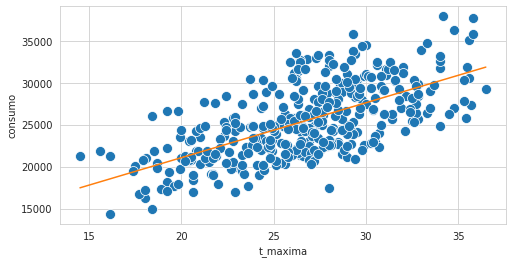

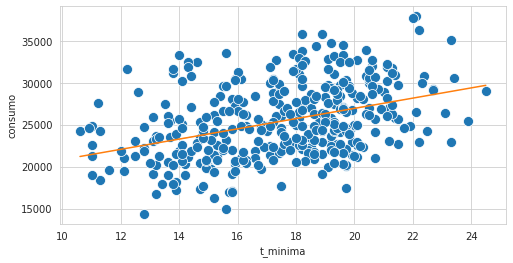

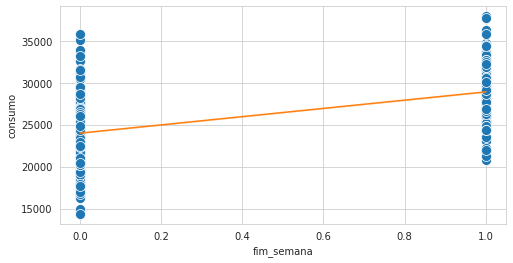

In [157]:
# REGRESSÃO LINEAR SIMPLES - GRÁFICO
for i in v_cols_num:
  if i != v_answer:
    v_x = df1[i].values.reshape(-1,1)
    lr_s.fit(v_x,y)
    
    y_pred= [lr_s.predict([[x]])[0] for x in df1[i]]
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df1[i],y=y,s=100)
    sns.lineplot(x=df1[i],y=y_pred,color='tab:orange')
    plt.show

# REGRESSÃO LINEAR MÚLTIPLA

In [0]:
# CRIANDO DATASET'S DE TREINO E TESTE - TIMESTAMP NÃO É UMA COLUNA ACEITA NA REGRESSÃO
x = df1.drop([v_answer], axis=1)
y = df1[v_answer]
#x = df.drop(['data','t_media','data_mes','precipitacao','data_dia','t_minima', v_answer], axis=1)
#x = x[x['t_maxima'] > 15.4]
#v_answer = df.consumo[df['t_maxima'] > 15.4]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=28)

In [159]:
# RELAÇÃO LINEAR MULTIPLA - PESOS DAS MINHAS VARIÁVEIS
lr_m = LinearRegression()
lr_m.fit(x_train,y_train)
for (i_lr,col) in zip(lr_m.coef_.round(2),x.columns):
  print('O Coeficiente da variável',col,'\tfoi ',i_lr)

O Coeficiente da variável t_maxima 	foi  695.55
O Coeficiente da variável t_minima 	foi  -56.65
O Coeficiente da variável fim_semana 	foi  5431.65


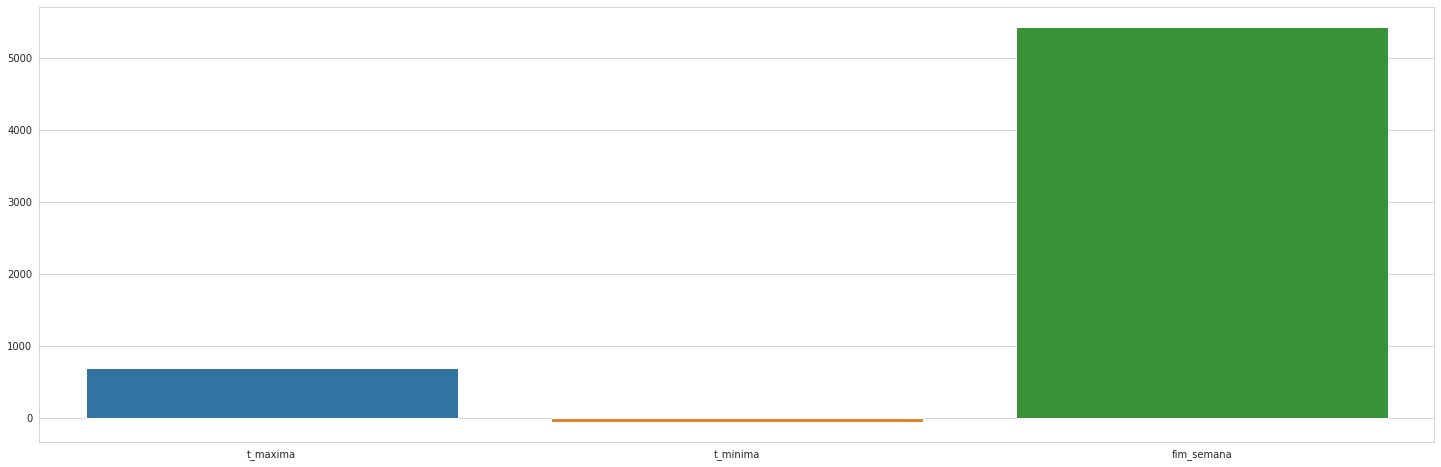

In [160]:
# GRÁFICO COM OS PESOS DA MINHA REGRESSÃO
plt.figure(figsize=(25,8))
sns.barplot(x = x.columns, y = lr_m.coef_)
plt.show()

In [161]:
# CALCULANDO O MEU ERRO PARA REGRESSÃO LINEAR MULTIPLA
v_erro = mean_squared_error(y_test,lr_m.predict((x_test)))
vm_erro = np.sqrt(v_erro).round(2)
if vm_erro < vs_erro:
  print('Meu erro em uma regressão multipla foi de',vm_erro,', melhor resultado do que em uma regressão linear simples',vs_erro)
else:
  print('Meu erro em uma regressão simples foi de',vs_erro,', melhor resultado do que em uma regressão linear multipla',vm_erro)

Meu erro em uma regressão multipla foi de 2429.51 , melhor resultado do que em uma regressão linear simples 3365.74


In [0]:
# VERIFICAMOS COM O TESTE ANTERIOR QUE NA REGRESSÃO LINEAR MULTIPLA QUE MEU MODELO, COMO ERA DE SE ESPERAR, JÁ ERRA MENOS DO QUE COM APENAS UMA VARIÁVEL.

In [162]:
# CALCULANDO A PRECISÃO DO MEU MODELO
prm_treino = lr_m.score(x_train,y_train)
prm_teste = lr_m.score(x_test,y_test)

print('Meu percentual de acerto no treino foi de',prm_treino.round(3),'\nMeu percentual de acerto no teste foi de',prm_teste.round(3))
#y_pred= lr.predict(x_test)
#r2_score(y_test,y_pred)

# r2 < 60% é ruim
# r2 > 80% é muito bom
# r2 = 1 é ruim

Meu percentual de acerto no treino foi de 0.707 
Meu percentual de acerto no teste foi de 0.656


In [182]:
r2_score(y_test,lr_m.predict(x_test))

0.6560316996351427

# REGRESSÃO POLINOMIAL

In [0]:
# TESTANDO MEU ERRO DE TREINO/TESTE NUM LOOP - IGUAL QUE NEM O DO PROFESSOR
x = df1.drop([v_answer], axis=1)
y = df1[v_answer]

trn_error = []
tst_error = []
prm_tst = []
prm_trn = []

lr_p = LinearRegression()

for i in range(1,8):
  poly = PolynomialFeatures(degree=i)
  x_poly = poly.fit_transform(x)

  xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size=0.25,random_state=28)

  lr_p.fit(xp_train,yp_train)

  ytst_pred = lr_p.predict(xp_test)
  ytrn_pred = lr_p.predict(xp_train)

  tst_error.append(mean_squared_error(yp_test, ytst_pred))
  trn_error.append(mean_squared_error(yp_train, ytrn_pred))
  prm_tst.append(lr_p.score(xp_test, yp_test))
  prm_trn.append(lr_p.score(xp_train, yp_train))


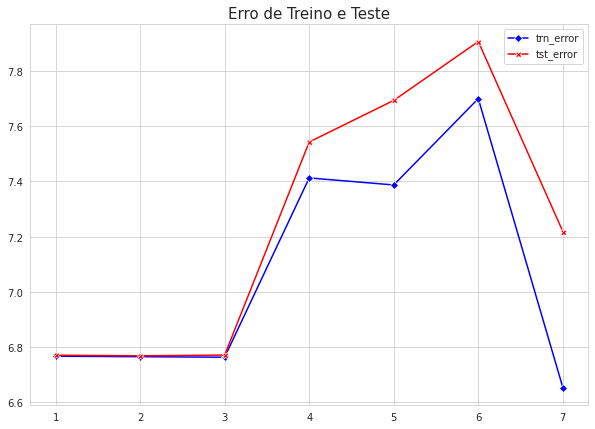

In [170]:
# GRÁFICO DOS ERROS GERADOS PELO LOOP
plt.figure(figsize=(10,7))

trn_error_v = np.log10(trn_error)
tst_error_v = np.log10(tst_error)

sns.lineplot(x = list(range(1,8)), y = trn_error_v, label='trn_error',color='b',marker='D')
sns.lineplot(x = list(range(1,8)), y = tst_error_v, label='tst_error',color='r',marker='X')

plt.title('Erro de Treino e Teste', size = 15)

plt.legend()
plt.show()

In [171]:
# A PRECISÃO DOS MEUS MODELOS POLINOMIAIS FOI
i = 0
for (a,b) in zip(prm_tst,prm_trn):
  i += 1
  print('Com polinomio grau',i,'\n\tPrecisão no teste ',a.round(3),'\n\tPrecisao no treino',b.round(3))

Com polinomio grau 1 
	Precisão no teste  0.656 
	Precisao no treino 0.707
Com polinomio grau 2 
	Precisão no teste  0.658 
	Precisao no treino 0.708
Com polinomio grau 3 
	Precisão no teste  0.656 
	Precisao no treino 0.709
Com polinomio grau 4 
	Precisão no teste  -1.033 
	Precisao no treino -0.295
Com polinomio grau 5 
	Precisão no teste  -1.876 
	Precisao no treino -0.221
Com polinomio grau 6 
	Precisão no teste  -3.696 
	Precisao no treino -1.507
Com polinomio grau 7 
	Precisão no teste  0.036 
	Precisao no treino 0.774


In [0]:
'''
Nesse projeto foi 
'''